In [11]:
import xarray as xr
import numpy as np

# Load the datasets
kg_ds = xr.open_dataset('/home/jguo/other_projects/1991_2020/koppen_geiger_0p5.nc')
loc_ds = xr.open_dataset('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/location_IDs.nc')

# Adjust the longitude range of kg_ds to match loc_ds (0 to 360)
kg_ds['lon'] = (kg_ds['lon'] + 360) % 360
kg_ds = kg_ds.sortby('lon')

# Reindex kg_ds to match the coordinates of loc_ds
kg_reindexed = kg_ds.reindex(lat=loc_ds.lat, lon=loc_ds.lon, method='nearest', fill_value=kg_ds.kg_class.attrs.get('_FillValue', np.nan))

# Merge kg_reindexed into loc_ds
merged_ds = loc_ds.assign(kg_class=kg_reindexed.kg_class)

# Save the merged dataset to a new netCDF file
output_path = '/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/kg_class_location_ID.nc'
merged_ds.to_netcdf(output_path)

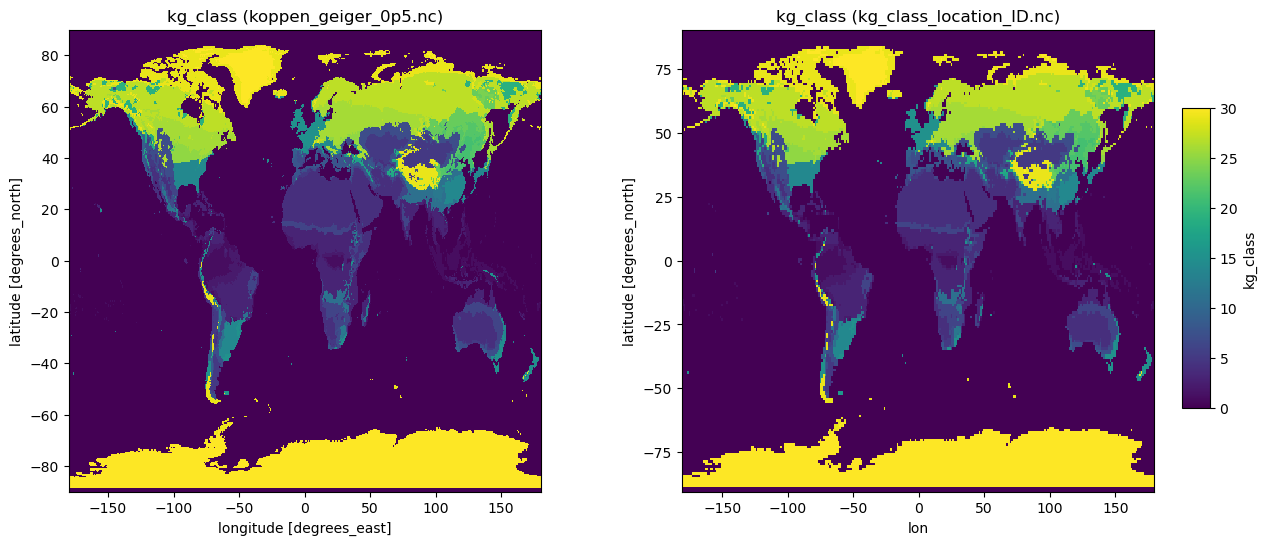

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the datasets
kg_ds = xr.open_dataset('/home/jguo/other_projects/1991_2020/koppen_geiger_0p5.nc')
merged_ds = xr.open_dataset('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/kg_class_location_ID.nc')

# Adjust the longitude range of merged_ds to match kg_ds
merged_ds = merged_ds.assign_coords(lon=(((merged_ds.lon + 180) % 360) - 180)).sortby('lon')

# Create a figure with two subplots and a colorbar axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Add a new axis for the colorbar

# Plot kg_class from koppen_geiger_0p5.nc
im1 = kg_ds.kg_class.plot(ax=ax1, cmap='viridis', add_colorbar=False)
ax1.set_title('kg_class (koppen_geiger_0p5.nc)')

# Plot kg_class from kg_class_location_ID.nc
im2 = merged_ds.kg_class.plot(ax=ax2, cmap='viridis', add_colorbar=False)
ax2.set_title('kg_class (kg_class_location_ID.nc)')

# Add a colorbar to the right of the second subplot
fig.colorbar(im2, cax=cbar_ax, label='kg_class')

# Adjust the layout and display the plot
plt.subplots_adjust(wspace=0.3)
plt.show()